  Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0 
     Ozone Solar.R Wind Temp Month Day
1 41.00000     190  7.4   67     5   1
2 36.00000     118  8.0   72     5   2
3 12.00000     149 12.6   74     5   3
4 18.00000     313 11.5   62     5   4
5 42.12931      NA 14.3   56     5   5
6 28.00000      NA 14.9   66     5   6

Call:
lm(formula = Ozone ~ Solar.R, data = airquality_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.356 -17.482  -6.556   9.976 120.748 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.73051    5.26941   4.503 1.37e-05 ***
Solar.R      0.09883    0.02552   3.872 0.000163 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.68 on 144 degrees of freedom
Multiple R-squared:  0.09431,	Adjusted R-squared:  0.08802 
F-statistic: 14.99 on 1 and 144 DF,  p-value: 0.0001631



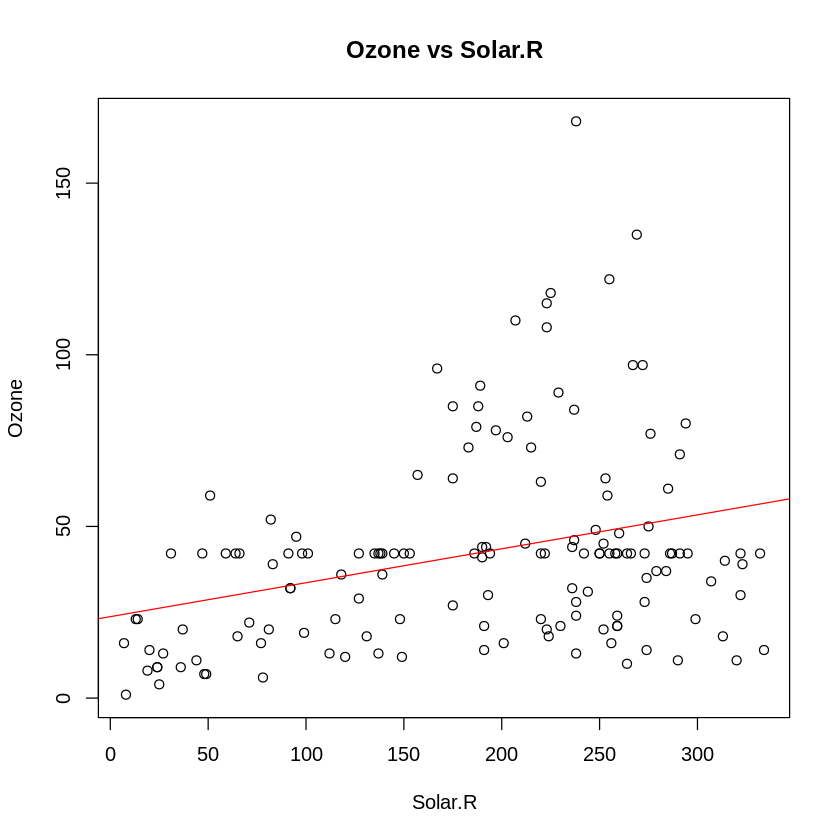

In [18]:
#1)
# Load the airquality dataset
data(airquality)

# Check for missing values
num_missing <- sapply(airquality, function(x) sum(is.na(x)))
print(num_missing)

# Drop missing values if less than 10%
drop_cols <- names(num_missing[num_missing < 0.1 * nrow(airquality)])
airquality_dropped <- airquality[, !(names(airquality) %in% drop_cols)]

# Replace missing values with mean if more than 10%
replace_cols <- names(num_missing[num_missing >= 0.1 * nrow(airquality)])
for (col in replace_cols) {
  mean_val <- mean(airquality[[col]], na.rm = TRUE)
  airquality[[col]][is.na(airquality[[col]])] <- mean_val
}

# Print the updated dataset
print(head(airquality))

#2)
airquality_filtered <- na.omit(airquality[, c("Ozone", "Solar.R")])

# Apply linear regression using the Least Squares Method
model <- lm(Ozone ~ Solar.R, data = airquality_filtered)
print(summary(model))

#3)
model <- lm(Ozone ~ Solar.R, data = airquality_filtered)

# Plot the scatter plot with regression line
plot(airquality_filtered$Solar.R, airquality_filtered$Ozone, xlab = "Solar.R", ylab = "Ozone", main = "Ozone vs Solar.R")
abline(model, col = "red")